In [3]:
from mytest.interpolant import Interpolant
import hydra
from hydra import initialize, compose
from omegaconf import OmegaConf
from mytest import utils as iu
import torch
with initialize(version_base=None, config_path="../config/inference"):
    conf = compose(config_name="base")
interpolant = Interpolant(conf.interpolant)

/WORK/PUBLIC/lulei_work/xjt/Protein_design/RFdiffusion/mytest/rfdiffusion/util.py:253: UserWarning: Using torch.cross without specifying the dim arg is deprecated.
Please either pass the dim explicitly or simply use torch.linalg.cross.
The default value of dim will change to agree with that of linalg.cross in a future release. (Triggered internally at /pytorch/aten/src/ATen/native/Cross.cpp:62.)
  Z = torch.cross(Xn, Yn)
/home/fit/lulei/WORK/.conda/envs/SE3nv/lib/python3.9/site-packages/dgl/backend/pytorch/sparse.py:104: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd(cast_inputs=th.float16)
/home/fit/lulei/WORK/.conda/envs/SE3nv/lib/python3.9/site-packages/dgl/backend/pytorch/sparse.py:128: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  def backward(ctx, dZ):
/home/fit/lulei/WORK/.conda/en

KeyboardInterrupt: 

In [ ]:
import pickle

# 以二进制模式打开文件
with open('/home/fit/lulei/WORK/xjt/Protein_design/CyclicPeptide/Dataset/ALL_PDB/dataset_cache/internal_blacklist_cache.pkl', 'rb') as f:
    data = pickle.load(f)

# 打印文件内容
print(len(data['blacklist']))

5875


In [ ]:
pdb_parsed = iu.process_target("/home/fit/lulei/WORK/xjt/Protein_design/CyclicPeptide/Dataset/ALL_PDB/PDB_ALL_DATASET/8GBC.pdb",#8VM6.pdb",",
                                parse_hetatom=False, 
                                center=False,
                                parse_link=True)

In [ ]:
torch.set_printoptions(profile='full')
pdb_parsed['alpha'].shape

torch.Size([63, 10, 2])

In [ ]:

pdb_parsed['alpha_tor_mask'].shape

torch.Size([63, 10])

In [ ]:
pdb_parsed = iu.process_target("/home/fit/lulei/WORK/xjt/Protein_design/CyclicPeptide/Dataset/ALL_PDB/PDB_ALL_DATASET/8VM6.pdb",
                                parse_hetatom=False, 
                                center=False,
                                parse_link=True)
print(pdb_parsed)                   
contig, res_mask = iu.generate_crop_contigs(pdb_parsed, 'A', mode='complex', crop_length=256 ,fixed_res={'proportion': 0.5, 'segments': 2})
print(contig)

contig_new = conf
contig_new.design_config.bond_condition = None
contig_new.design_config.contigs = contig
contig_new.design_config.partial_t = 0.1
target = iu.Target(conf.design_config,pdb_parsed)
print(target.full_alpha)
print(target.full_alpha_tor_mask)


{'xyz_14': tensor([[[185.0130, 129.2340, 194.5580],
         [184.0130, 130.0840, 195.1740],
         [182.6300, 129.8890, 194.5880],
         ...,
         [  0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000]],

        [[182.0020, 130.9910, 194.1880],
         [180.6680, 130.9710, 193.6110],
         [180.6400, 131.8150, 192.3460],
         ...,
         [  0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000]],

        [[179.7750, 131.4290, 191.4140],
         [179.6150, 132.2010, 190.1920],
         [179.1200, 133.6030, 190.5150],
         ...,
         [  0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000]],

        ...,

        [[196.9930, 216.9040, 238.6560],
         [196.7330, 215.7630, 239.5230],
         [196.7010, 214.4710, 238.7220],
         ...,
         [  0.0000,   0.0000,   0.0000],
         [ 

/WORK/PUBLIC/lulei_work/xjt/Protein_design/RFdiffusion/mytest/utils.py:715: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  chain_seq.append(torch.tensor(contig['seq']))
/WORK/PUBLIC/lulei_work/xjt/Protein_design/RFdiffusion/mytest/utils.py:720: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  chain_xyz.append(torch.tensor(contig['xyz']))
/WORK/PUBLIC/lulei_work/xjt/Protein_design/RFdiffusion/mytest/utils.py:725: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  chain_alpha.append(torch.tensor(contig['alpha']))
/WORK/PUBLIC/lulei_work/xjt/Protein_

In [ ]:
def generate_crop_target_pdb(pdb_file,chain_id,crop_mode,crop_length=256,fixed_res=None):
    pdb_parsed = iu.process_target(pdb_file,
                                   parse_hetatom=False, 
                                   center=False,
                                   parse_link=True)
    
    contig, res_mask = iu.generate_crop_contigs(pdb_parsed, chain_id, mode=crop_mode, crop_length=crop_length, fixed_res=fixed_res)
    print(contig)
    contig_new = conf
    if crop_mode == 'complex':
        contig_new.design_config.bond_condition = ['B|B']
    else:
        contig_new.design_config.bond_condition = None
    contig_new.design_config.contigs = contig
    contig_new.design_config.partial_t = 0.1
    print(conf.design_config)
    target = iu.Target(contig_new.design_config,pdb_parsed)
    target.res_mask = res_mask
    return target

In [ ]:
target1 = generate_crop_target_pdb(pdb_file="/home/fit/lulei/WORK/xjt/Protein_design/CyclicPeptide/Dataset/ALL_MMCIF/CIF_ALL_DATASET/8VM6.cif",
                                crop_length=256,
                                chain_id='A',
                                crop_mode='monomer',
                                fixed_res={'proportion': 0.3, 'segments': 1})
target2 = generate_crop_target_pdb(pdb_file="/home/fit/lulei/WORK/xjt/Protein_design/CyclicPeptide/Dataset/ALL_MMCIF/CIF_ALL_DATASET/8VM6.cif",
                                crop_length=256,
                                chain_id='A',
                                crop_mode='monomer',)
                                #fixed_res={'proportion': 0.3, 'segments': 1})
torch.set_printoptions(profile="full")
print(target1.full_xyz-target2.full_xyz)
print(target1.full_rf_idx - target2.full_rf_idx)
print(target1.full_rf_idx)
print(target2.full_rf_idx)

[['A81-A163:seq_PNA:str_PNA', 'A164-A239:seq_FIX:str_FIX', 'A240-A336:seq_PNA:str_PNA']]
{'contigs': [['A81-A163:seq_PNA:str_PNA', 'A164-A239:seq_FIX:str_FIX', 'A240-A336:seq_PNA:str_PNA']], 'input_pdb': '/home/fit/lulei/WORK/xjt/Protein_design/CyclicPeptide/Dataset/ALL_PDB/PDB_ALL_DATASET/3A55.pdb', 'length': None, 'partial_t': 0.1, 'bond_condition': None}


/WORK/PUBLIC/lulei_work/xjt/Protein_design/RFdiffusion/mytest/utils.py:958: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  chain_seq.append(torch.tensor(contig['seq']))
/WORK/PUBLIC/lulei_work/xjt/Protein_design/RFdiffusion/mytest/utils.py:963: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  chain_xyz.append(torch.tensor(contig['xyz']))
/WORK/PUBLIC/lulei_work/xjt/Protein_design/RFdiffusion/mytest/utils.py:968: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  chain_alpha.append(torch.tensor(contig['alpha']))
/WORK/PUBLIC/lulei_work/xjt/Protein_

[['A127-A382:seq_PNA:str_PNA']]
{'contigs': [['A127-A382:seq_PNA:str_PNA']], 'input_pdb': '/home/fit/lulei/WORK/xjt/Protein_design/CyclicPeptide/Dataset/ALL_PDB/PDB_ALL_DATASET/3A55.pdb', 'length': None, 'partial_t': 0.1, 'bond_condition': None}
tensor([[[-7.2660e+00, -1.8322e+01, -1.2156e+01],
         [-7.5420e+00, -1.7886e+01, -1.2797e+01],
         [-6.5450e+00, -1.8484e+01, -1.3490e+01],
         [-7.5610e+00, -1.9586e+01, -1.5059e+01],
         [-8.2280e+00, -1.6991e+01, -1.3780e+01],
         [-9.6290e+00, -1.5599e+01, -1.5472e+01],
         [-8.8320e+00, -1.4259e+01, -1.7763e+01],
         [-1.2517e+01, -1.5400e+01, -1.4912e+01],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00]],

        [[-4.5670e+00, -1.7792e+01, -1.2326e+01],
  

/WORK/PUBLIC/lulei_work/xjt/Protein_design/RFdiffusion/mytest/utils.py:958: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  chain_seq.append(torch.tensor(contig['seq']))
/WORK/PUBLIC/lulei_work/xjt/Protein_design/RFdiffusion/mytest/utils.py:963: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  chain_xyz.append(torch.tensor(contig['xyz']))


In [ ]:
import random
import torch
from collections import defaultdict

pdb_dir = "/home/fit/lulei/WORK/xjt/Protein_design/CyclicPeptide/Dataset/ALL_PDB/PDB_ALL_DATASET/"
# pdb_file = pdb_dir+'1FOD.pdb'
# target = generate_crop_target_pdb(pdb_file=pdb_file,
#                                     crop_length=256,
#                                     chain_id='2',
#                                     crop_mode='monomer',)

#                                    fixed_res={'proportion': 0.3, 'segments': 1})
# Initialize a dictionary to store lists for each "full_" key
full_data = defaultdict(list)

for i in range(2784,2790):#len(data['blacklist'])):
    #random_seed = random.randint(0, len(data['blacklist'])-1)
    pdb_name = data['blacklist'][i]
    pdb_file = pdb_dir + pdb_name.split("_")[0] + ".pdb"
    print(f"{i}:Processing {pdb_file} with chain {pdb_name.split('_')[1]}")
    chain_id = pdb_name.split("_")[1]
    try:
        target = generate_crop_target_pdb(pdb_file=pdb_file,
                                        crop_length=256,
                                        chain_id=chain_id,
                                        crop_mode='complex',
                                        fixed_res={'proportion': 0.3, 'segments': 2})

        rotmats_1 = iu.get_R_from_xyz(target.full_xyz[None,:,:3,:])
        xyz = iu.get_xyz_from_RT(rotmats_1,target.full_xyz[None,:,1,:])
        print(xyz.shape)

        loss = (torch.sqrt(((target.full_xyz[None,:,:3,:]-xyz)**2)) * target.res_mask[...,None,None].float()).sum()
        loss = loss / target.res_mask.float().sum()
        print(loss)
        if loss > 1:
            raise ValueError(f"Loss {loss} is too high for {pdb_file} with chain {chain_id}")
    except ValueError as e:
        print(e)
        continue
    
    # Process all keys containing "full"
    for key in target.__dict__.keys():
        if 'full' in key or "mask" in key:
            full_data[key].append(getattr(target, key))


# Process the collected data - concatenate tensors, keep lists as is
processed_data = {}
for key, value_list in full_data.items():
    if len(value_list) > 0 and isinstance(value_list[0], torch.Tensor):
        vl = [v.unsqueeze(0) for v in value_list if isinstance(v, torch.Tensor)]
        processed_data[key] = torch.cat(vl, dim=0)
    else:
        processed_data[key] = value_list



2784:Processing /home/fit/lulei/WORK/xjt/Protein_design/CyclicPeptide/Dataset/ALL_PDB/PDB_ALL_DATASET/8VM6.pdb with chain B
[['B110-B113:seq_PNA:str_PNA', 'B114-B114:seq_FIX:str_FIX', 'B115-B115:seq_PNA:str_PNA', 'B117-B118:seq_PNA:str_PNA', 'B121-B121:seq_PNA:str_PNA', 'B122-B122:seq_FIX:str_FIX', 'B123-B125:seq_PNA:str_PNA', 'B127-B130:seq_PNA:str_PNA', 'B131-B132:seq_FIX:str_FIX', 'B133-B133:seq_PNA:str_PNA', 'B136-B142:seq_PNA:str_PNA', 'B143-B146:seq_FIX:str_FIX', 'B147-B153:seq_PNA:str_PNA', 'B154-B157:seq_FIX:str_FIX', 'B158-B163:seq_PNA:str_PNA', 'B166-B166:seq_PNA:str_PNA', 'B170-B170:seq_PNA:str_PNA', 'B173-B174:seq_PNA:str_PNA', 'B177-B177:seq_PNA:str_PNA', 'B179-B179:seq_PNA:str_PNA', 'B194-B196:seq_PNA:str_PNA', 'B197-B198:seq_FIX:str_FIX', 'B199-B203:seq_PNA:str_PNA', 'B204-B204:seq_FIX:str_FIX', 'B250-B250:seq_PNA:str_PNA', 'B251-B251:seq_FIX:str_FIX', 'B252-B252:seq_PNA:str_PNA', 'B253-B253:seq_FIX:str_FIX', 'B254-B257:seq_PNA:str_PNA', 'B260-B262:seq_PNA:str_PNA', 'B26

/WORK/PUBLIC/lulei_work/xjt/Protein_design/RFdiffusion/mytest/utils.py:442: RuntimeWarning: Mean of empty slice.
  ca_center = target_struct["xyz"][:, :1, :].mean(axis=0, keepdims=True)
/home/fit/lulei/WORK/.conda/envs/SE3nv/lib/python3.9/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/WORK/PUBLIC/lulei_work/xjt/Protein_design/RFdiffusion/mytest/utils.py:1161: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  target_coords = pdb_parsed['xyz'][:,1][pdb_parsed['pdb_idx_to_chain_id'] == target_chain_id]


[['F29-F69:seq_PNA:str_PNA', 'F70-F87:seq_FIX:str_FIX', 'F88-F129:seq_PNA:str_PNA', 'F130-F147:seq_FIX:str_FIX', 'F148-F174:seq_PNA:str_PNA'], ['D30-D170:seq_FIX:str_FIX', 'New_3-3']]
{'contigs': [['F29-F69:seq_PNA:str_PNA', 'F70-F87:seq_FIX:str_FIX', 'F88-F129:seq_PNA:str_PNA', 'F130-F147:seq_FIX:str_FIX', 'F148-F174:seq_PNA:str_PNA'], ['D30-D170:seq_FIX:str_FIX', 'New_3-3']], 'input_pdb': '/home/fit/lulei/WORK/xjt/Protein_design/CyclicPeptide/Dataset/ALL_PDB/PDB_ALL_DATASET/3A55.pdb', 'length': None, 'partial_t': 0.1, 'bond_condition': ['B|B']}
torch.Size([1, 256, 3, 3])
tensor(0.0734)


In [ ]:
for k,v in processed_data.items():
    print(f"{k}: {v.shape if isinstance(v, torch.Tensor) else len(v)}")

full_seq: torch.Size([4, 256])
full_xyz: torch.Size([4, 256, 14, 3])
full_rf_idx: torch.Size([4, 256])
full_mask_str: torch.Size([4, 256])
full_mask_seq: torch.Size([4, 256])
full_pdb_idx: 4
full_origin_pdb_idx: 4
full_bond_matrix: torch.Size([4, 256, 256])
full_bond_mask: torch.Size([4, 256, 256])
res_mask: torch.Size([4, 256])


In [ ]:
target.__dict__.keys()

dict_keys(['design_conf', 'chain_order', 'pdb', 'chain_list', 'full_seq', 'full_xyz', 'full_rf_idx', 'full_mask_str', 'full_mask_seq', 'full_pdb_idx', 'full_origin_pdb_idx', 'full_bond_matrix', 'full_bond_mask', 'res_mask'])

In [ ]:
import torch
rotmats_1 = iu.get_R_from_xyz(processed_data['full_xyz'][:,:,:3,:])
B = processed_data['full_xyz'].shape[0]
noise_batch_1 = interpolant.corrupt_batch(
        trans_1 = processed_data['full_xyz'][:,:,1,:],
        rotmats_1= rotmats_1,
        aatypes_1= processed_data['full_seq'],
        ss_1= processed_data['full_bond_matrix'],
        res_mask=processed_data['res_mask'].float(),
        trans_diffuse_mask= processed_data['full_mask_str'].float(),
        rots_diffuse_mask= processed_data['full_mask_str'].float(),
        aatypes_diffuse_mask= processed_data['full_mask_seq'].float(),
        ss_diffuse_mask= processed_data['full_bond_mask'].float(), 
        t = torch.full((B,),0.05)
    )

In [ ]:

noise_batch_2 = interpolant.corrupt_batch(
        trans_1 = processed_data['full_xyz'][:,:,1,:],
        rotmats_1= rotmats_1,
        aatypes_1= processed_data['full_seq'],
        ss_1= processed_data['full_bond_matrix'],
        res_mask=processed_data['res_mask'].float(),
        trans_diffuse_mask= processed_data['full_mask_str'].float(),
        rots_diffuse_mask= processed_data['full_mask_str'].float(),
        aatypes_diffuse_mask= processed_data['full_mask_seq'].float(),
        ss_diffuse_mask= processed_data['full_bond_mask'].float(), 
        t = torch.full((B,),0.9)
    )

In [ ]:
print(((processed_data['full_xyz'][:,:,1,:] - noise_batch_2['trans_t'])**2).mean())
print(((processed_data['full_xyz'][:,:,1,:] - noise_batch_1['trans_t'])**2).mean())
print(((rotmats_1 - noise_batch_2['rotmats_t'])**2).mean())
print(((rotmats_1 - noise_batch_1['rotmats_t'])**2).mean())
print(((processed_data['full_seq'] - noise_batch_2['aatypes_t'])**2).mean())
print(((processed_data['full_seq'] - noise_batch_1['aatypes_t'])**2).mean())
print(((processed_data['full_bond_matrix'] - noise_batch_2['ss_t'])**2).sum())
print(((processed_data['full_bond_matrix'] - noise_batch_1['ss_t'])**2).sum())

tensor(59.0656)
tensor(5274.2627)
tensor(0.0062, dtype=torch.float64)
tensor(0.2121, dtype=torch.float64)
tensor(6.6582)
tensor(47.6152)
tensor(0.0200)
tensor(1.8050)


In [ ]:
noise_batch_2.keys()

dict_keys(['trans_t', 'rotmats_t', 'aatypes_t', 'ss_t', 'trans_sc', 'aatypes_sc'])

In [ ]:
print(target.full_seq[None,:])
print(noise_batch_1['aatypes_t'])

tensor([[11, 10,  3, 13,  7, 11, 16, 19, 14, 19,  7,  9,  3,  6,  6,  2,  7, 12,
          9, 11, 19, 13, 12, 10, 16,  5,  5, 13, 18,  6,  9, 14, 16, 11,  6,  2,
          5, 18,  9,  7, 12, 10,  5,  0, 19, 11,  2,  6, 14, 19,  8,  9, 13, 10,
         11, 14,  2, 15,  2,  6,  9,  7, 11, 19,  6,  0, 15, 14,  3, 19,  1, 18,
         13, 16,  9, 10, 16, 11, 19,  7,  5, 16,  2, 11, 10,  0, 19,  9, 14,  3,
         19,  0, 16, 10,  2, 15, 10, 13,  2,  5,  9, 11,  2,  5, 15,  4, 16,  0,
         15, 14,  4,  9, 16, 13,  1, 18, 14, 19,  3,  7,  4, 18,  0,  1,  0,  8,
         11, 12,  1,  5,  9, 10, 12,  2,  2,  7, 18,  3,  4,  6, 11,  5, 13, 19,
         18,  7,  2, 10, 11,  0, 15, 16,  7, 16,  4,  4, 19,  0, 17, 15, 18,  8,
         19,  0,  9, 10, 19, 15, 18, 11,  2,  0,  7, 19, 16,  6, 11,  1,  9,  9,
          3, 14, 10, 13,  7, 14, 19, 16,  3,  0, 17,  1,  2,  0,  4, 19,  2, 16,
          4,  7, 15,  0, 15, 19, 15, 18,  0,  2, 16,  0,  7,  2, 19, 18, 18,  1,
         15, 14, 15,  2, 15,

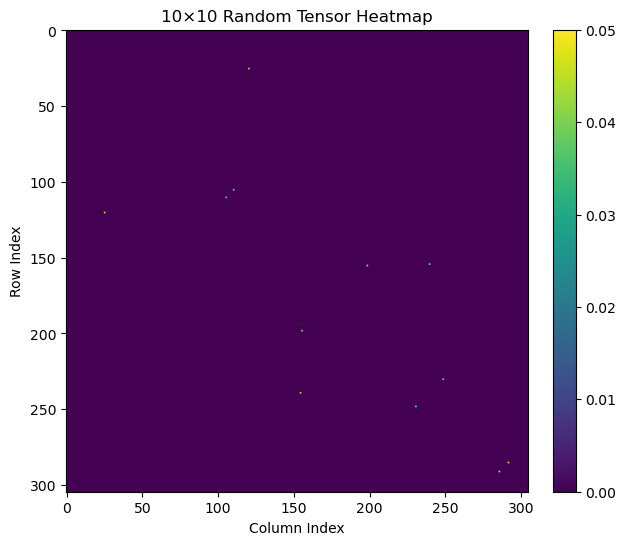

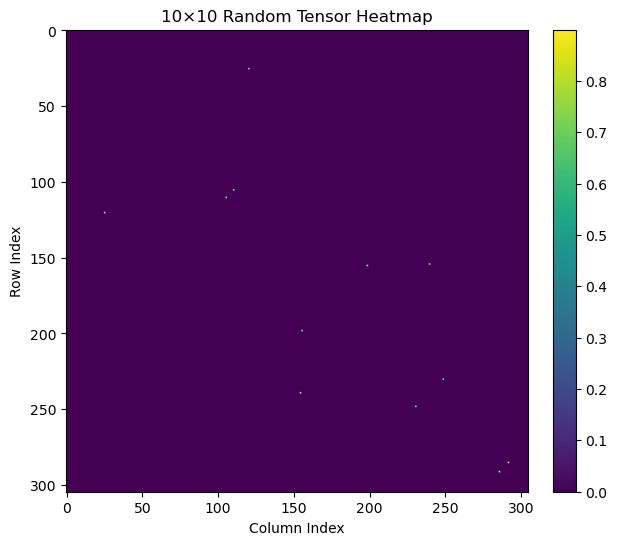

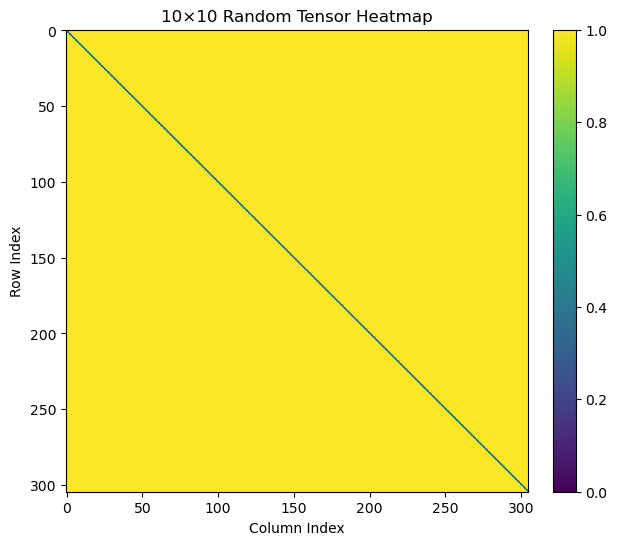

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_tensor_heatmap(tensor, title="Tensor Heatmap", cmap="viridis"):
    """
    绘制L×L tensor矩阵的热图
    
    参数:
    tensor -- 输入的L×L矩阵
    title -- 热图标题(可选)
    cmap -- 颜色映射(可选)
    """
    plt.figure(figsize=(8, 6))
    
    # 显示热图
    im = plt.imshow(tensor, cmap=cmap)
    
    # 添加颜色条
    plt.colorbar(im, fraction=0.046, pad=0.04)
    
    # 设置标题和坐标轴
    plt.title(title)
    plt.xlabel("Column Index")
    plt.ylabel("Row Index")
    
    # 显示网格线(可选)
    plt.grid(False)
    
    plt.show()

# 示例使用
if __name__ == "__main__":
    # 创建一个示例的10×10 tensor矩阵
    L = 10
    example_tensor = np.random.rand(L, L)  # 随机矩阵

    plot_tensor_heatmap(noise_batch_1['ss_t'].squeeze(), title="10×10 Random Tensor Heatmap")

    plot_tensor_heatmap(noise_batch_2['ss_t'].squeeze(), title="10×10 Random Tensor Heatmap")
    plot_tensor_heatmap(target.full_bond_mask[None,:,:].squeeze(), title="10×10 Random Tensor Heatmap")


In [ ]:
print(noise_batch_1['ss_t'].shape)
print(noise_batch_1['rotmats_t'].shape)
print(noise_batch_1['aatypes_t'].shape)
print(noise_batch_1['trans_t'].shape)

torch.Size([1, 305, 305])
torch.Size([1, 305, 3, 3])
torch.Size([1, 305])
torch.Size([1, 305, 3])


In [3]:
import numpy as np

# --- Helper functions for verification ---
def check_properties(B: torch.Tensor, tol: float = 1e-9):
    """Checks if a matrix B has the desired properties."""
    is_binary = torch.all((B == 0) | (B == 1))
    is_symmetric = torch.allclose(B, B.T)
    is_sub_doubly_stochastic = torch.all(B.sum(dim=1) <= 1 + tol)
    print(f"Is Binary? \t\t\t{is_binary}")
    print(f"Is Symmetric? \t\t\t{is_symmetric}")
    print(f"Is Sub-Doubly Stochastic? \t{is_sub_doubly_stochastic}")
    return is_binary and is_symmetric and is_sub_doubly_stochastic

# --- 1. Construct a valid input matrix A ---
# Let's create a 6x6 matrix from a convex combination of two different matchings.
# This guarantees it's symmetric and doubly-stochastic (a subset of sub-doubly stochastic).
n = 10
# Matching 1: (0,1), (2,3), (4,5)
B1 = torch.zeros((n, n))
B1[0,1] = B1[1,0] = 1
B1[2,3] = B1[3,2] = 1


# Matching 2: (1,2), (3,4), (5,0) (a cycle graph matching)
B2 = torch.zeros((n, n))
for i in range(n):
    if i+1 < n:
        B2[i+1,n-i-1] = 1

# Create a fractional matrix A
prob = 0.566
A = prob * B1 + (1 - prob) * B2
def create_test_matrix(L: int) -> np.ndarray:
    """
    创建一个 L x L 的对称、亚双随机矩阵 A 用于测试。
    """
    # 1. 创建一个 [0, 1) 之间的随机矩阵
    rand_matrix = np.random.rand(L, L)
    
    # 2. 使其对称
    A = (rand_matrix + rand_matrix.T) / 2
    
    # 3. 确保其亚双随机性
    # 计算每行的和
    row_sums = np.sum(A, axis=1)
    # 找到最大的行和
    max_row_sum = np.max(row_sums)
    
    # 如果最大的行和大于1，则对整个矩阵进行缩放以满足约束
    # 我们除以一个略大于 max_row_sum 的数，以避免行和恰好为1的情况，增加通用性
    if max_row_sum > 1.0:
        A = A / (max_row_sum + 0.1) # 保证行和严格小于1

    # 确保对角线元素不为1 (否则该行/列不能有其他元素)
    np.fill_diagonal(A, np.clip(np.diag(A), 0, 0.95))

    return A



In [3]:
import numpy as np

def create_test_matrix(L: int) -> np.ndarray:
    """
    创建一个 L x L 的对称、亚双随机矩阵 A 用于测试。
    """
    # 1. 创建一个 [0, 1) 之间的随机矩阵
    rand_matrix = np.random.rand(L, L)
    
    # 2. 使其对称
    A = (rand_matrix + rand_matrix.T) / 2
    
    # 3. 确保其亚双随机性
    # 计算每行的和
    row_sums = np.sum(A, axis=1)
    # 找到最大的行和
    max_row_sum = np.max(row_sums)
    
    # 如果最大的行和大于1，则对整个矩阵进行缩放以满足约束
    # 我们除以一个略大于 max_row_sum 的数，以避免行和恰好为1的情况，增加通用性
    if max_row_sum > 1.0:
        A = A / (max_row_sum + 0.1) # 保证行和严格小于1

    # 确保对角线元素不为1 (否则该行/列不能有其他元素)
    np.fill_diagonal(A, np.clip(np.diag(A), 0, 0.95))

    return A


In [1]:
import torch
import numpy as np
from scipy.optimize import linear_sum_assignment

# 辅助函数 1: 增广 (在内部使用，操作于单个NumPy矩阵)
def _augment_to_doubly_stochastic(A: np.ndarray) -> np.ndarray:
    """
    将一个对称、亚双随机矩阵 A 转换为一个对称、双随机矩阵 C。
    """
    L = A.shape[0]
    C = A.copy()
    row_sums_off_diagonal = np.sum(C, axis=1) - np.diag(C)
    new_diagonals = 1.0 - row_sums_off_diagonal
    np.fill_diagonal(C, new_diagonals)
    return C

# 辅助函数 2: 分解 (在内部使用，操作于单个NumPy矩阵)
def _birkhoff_decomposition(C: np.ndarray, tol=5e-3):
    """
    Birkhoff Decomposition Matching Sampling (BDMS) Algorithm
    将双随机矩阵 C 分解为置换矩阵的凸组合。
    返回一个列表，每个元素是 (theta, P) 的元组。
    """
    L = C.shape[0]
    C_current = C.copy()
    decomposition = []

    while np.max(C_current) > tol:
        #cost_matrix = (C_current < tol).astype(float)
        cost_matrix = -C_current
        cost_matrix[C_current < tol] = 1e6 # 给非常小的或0的项一个巨大的成本
        row_ind, col_ind = linear_sum_assignment(cost_matrix)
        
        P_k = np.zeros((L, L), dtype=int)
        P_k[row_ind, col_ind] = 1
        
        # 确保theta_k不为0，避免无限循环
        valid_entries = C_current[row_ind, col_ind]
        theta_k = np.min(valid_entries[valid_entries > tol])
        
        decomposition.append((theta_k, P_k))
        
        C_current -= theta_k * P_k
        C_current[C_current < tol] = 0

    return decomposition

# --- 主要功能函数 ---

def preprocess_birkhoff_decomposition(A_batch: torch.Tensor) -> list:
    """
    预处理函数：为一批(B,L,L)的亚双随机矩阵计算Birkhoff分解。
    
    这是一个昂贵的操作，应该只执行一次。

    参数:
        A_batch (torch.Tensor): 输入的概率矩阵，形状为 (B, L, L)。
                                B是批次大小, L是节点数。

    返回:
        list: 一个列表，长度为B。每个元素是对应矩阵的分解结果，
              其本身也是一个 (theta, PermutationMatrix) 元组的列表。
    """
    if A_batch.dim() != 3 or A_batch.shape[1] != A_batch.shape[2]:
        raise ValueError("输入张量 A_batch 必须是 (B, L, L) 形状。")

    batch_size = A_batch.shape[0]
    decompositions_batch = []

    for i in range(batch_size):
        # 将单个tensor转为numpy进行计算
        A_single_np = A_batch[i].cpu().numpy()
        
        # 验证输入
        if not np.allclose(A_single_np, A_single_np.T, atol=1e-4) or np.any(np.sum(A_single_np, axis=1) > 1.0001):
            raise ValueError(f"批次中索引 {i} 的矩阵必须是对称且亚双随机的。")
            
        # 阶段一：增广
        C_single = _augment_to_doubly_stochastic(A_single_np)
        
        # 阶段二：分解
        decomposition = _birkhoff_decomposition(C_single)
        decompositions_batch.append(decomposition)
        
    return decompositions_batch


def sample_SDSS_binary_matrix(decompositions_batch: list) -> torch.Tensor:
    """
    Augmented Birkhoff Decomposition Matching Sampling (BDMS) Algorithm
    采样函数：从预计算的分解结果中采样一批 (B,L,L) 的二值匹配矩阵。
    Sub-Doubly Stochastic Symmetric
    这是一个非常快速的操作，可以被大量重复调用。

    参数:
        decompositions_batch (list): `preprocess_birkhoff_decomposition` 函数的输出。

    返回:
        torch.Tensor: 采样出的二值匹配矩阵，形状为 (B, L, L)，数据类型为 torch.int。
    """
    batch_size = len(decompositions_batch)
    if batch_size == 0:
        return torch.empty(0)
    
    # 假设所有矩阵大小相同
    L = decompositions_batch[0][0][1].shape[0] if decompositions_batch[0] else 0
    B_list = []

    for i in range(batch_size):
        single_decomposition = decompositions_batch[i]
        
        if not single_decomposition:
            B_list.append(np.zeros((L, L), dtype=int))
            continue

        thetas = np.array([item[0] for item in single_decomposition])
        permutations = [item[1] for item in single_decomposition]
        
        # 归一化 a, 使其成为概率分布 (理论上和为1，这里为了稳健)
        probabilities = thetas / np.sum(thetas)
        
        # 采样一个索引
        sampled_index = np.random.choice(len(probabilities), p=probabilities)
        P_sampled = permutations[sampled_index]
        
        # 将置换矩阵 P 转换为匹配矩阵 B (使用修正后的正确逻辑)
        B_single = np.zeros((L, L), dtype=int)
        rows, cols = np.where(P_sampled == 1)
        for r, c in zip(rows, cols):
            if r < c: # 关键：避免重复计算
                B_single[r, c] = 1
                B_single[c, r] = 1
        
        B_list.append(B_single)
        
    # 将结果列表堆叠成一个PyTorch张量
    return torch.from_numpy(np.array(B_list)).int()

In [4]:
import torch
import numpy as np
from scipy.optimize import linear_sum_assignment
import time

# --- 向量化辅助函数 (来自之前的回答) ---
def augment_batch_to_doubly_stochastic_pt(A_batch: torch.Tensor) -> torch.Tensor:
    """完全向量化的PyTorch版本，将一批矩阵增广为双随机矩阵。"""
    diagonals = torch.diagonal(A_batch, dim1=-2, dim2=-1)
    row_sums = torch.sum(A_batch, dim=2)
    row_sums_off_diagonal = row_sums - diagonals
    new_diagonals = 1.0 - row_sums_off_diagonal
    C_batch = A_batch.clone()
    C_batch.diagonal(dim1=-2, dim2=-1).copy_(new_diagonals)
    return C_batch

# --- 核心替代方案 ---
def sample_gumbel_matching(A_batch: torch.Tensor, tol=1e-9) -> torch.Tensor:
    """
    使用 Gumbel-Matching 方法从一批亚双随机矩阵中采样匹配矩阵。
    [已修正] 此版本修正了从置换矩阵P到匹配矩阵B的转换逻辑。
    """
    if A_batch.dim() != 3 or A_batch.shape[1] != A_batch.shape[2]:
        raise ValueError("输入张量 A_batch 必须是 (B, L, L) 形状。")
    
    device = A_batch.device
    B, L, _ = A_batch.shape

    # 1. 向量化增广 -> C_batch
    C_batch = augment_batch_to_doubly_stochastic_pt(A_batch)

    # 2. 向量化准备成本矩阵
    log_C_batch = torch.log(C_batch.clamp(min=tol))
    gumbel_noise = -torch.log(-torch.log(torch.rand(B, L, L, device=device) + tol) + tol)
    cost_matrices = -(log_C_batch + gumbel_noise)
    cost_matrices_np = cost_matrices.cpu().numpy()

    # 3. 循环调用线性分配求解器
    all_rows, all_cols = [], []
    for i in range(B):
        row_ind, col_ind = linear_sum_assignment(cost_matrices_np[i])
        all_rows.append(row_ind)
        all_cols.append(col_ind)

    # 4. 向量化构建置换矩阵 P
    rows_np = np.array(all_rows)
    cols_np = np.array(all_cols)
    batch_index = np.arange(B).repeat(L)
    perm_matrices_np = np.zeros((B, L, L), dtype=np.int8)
    perm_matrices_np[batch_index, rows_np.flatten(), cols_np.flatten()] = 1
    
    # --- 这里是关键的修正 ---
    # 5. 将置换矩阵 P 转换为匹配矩阵 B (使用正确的上三角逻辑)
    #    提取置换矩阵的严格上三角部分 (k=1 表示不包含对角线)
    perm_upper_triangle = np.triu(perm_matrices_np, k=1)
    #    基于上三角部分构建对称的匹配矩阵，这精确地复现了 "if r < c" 逻辑
    B_matrices_np = perm_upper_triangle + perm_upper_triangle.transpose(0, 2, 1)

    return torch.from_numpy(B_matrices_np).to(device=device, dtype=torch.int)

# --- 示例与对比 ---
if __name__ == '__main__':
    # 导入原始实现用于对比

    B = 2
    L = 400
    
    # 生成测试数据
    A_sub_stochastic = torch.from_numpy(create_test_matrix(L)).unsqueeze(0).repeat(B, 1, 1)
    # A_sub_stochastic = torch.tensor([
    #     [0.0, 0.0, 0.99],
    #     [0.0, 0.0, 0.0],
    #     [0.99, 0.0, 0.0]
    # ], dtype=torch.float32).repeat(B, 1, 1)
    print(f"测试数据: Batch Size={B}, Matrix Size={L}x{L}")

    # --- 原始方法计时 ---
    print("\n--- 正在运行原始的Birkhoff分解+采样方法 ---")
    start_time_orig = time.time()
    decompositions_orig = preprocess_birkhoff_decomposition(A_sub_stochastic)
    sampled_matrices_orig = sample_SDSS_binary_matrix(decompositions_orig)
    end_time_orig = time.time()
    print(f"原始方法总耗时: {end_time_orig - start_time_orig:.4f} 秒")

    # --- Gumbel-Matching 方法计时 ---
    print("\n--- 正在运行Gumbel-Matching替代方法 ---")
    start_time_gumbel = time.time()
    sampled_matrices_gumbel = sample_gumbel_matching(A_sub_stochastic)
    end_time_gumbel = time.time()
    print(f"Gumbel-Matching方法耗时: {end_time_gumbel - start_time_gumbel:.4f} 秒")
    
    speedup = (end_time_orig - start_time_orig) / (end_time_gumbel - start_time_gumbel)
    print(f"\n性能提升倍数: {speedup:.2f}x")
    
    print(f"\n原始方法采样结果形状: {sampled_matrices_orig.shape}")
    print(f"Gumbel方法采样结果形状: {sampled_matrices_gumbel.shape}")

测试数据: Batch Size=2, Matrix Size=400x400

--- 正在运行原始的Birkhoff分解+采样方法 ---
原始方法总耗时: 0.1239 秒

--- 正在运行Gumbel-Matching替代方法 ---
Gumbel-Matching方法耗时: 0.5709 秒

性能提升倍数: 0.22x

原始方法采样结果形状: torch.Size([2, 400, 400])
Gumbel方法采样结果形状: torch.Size([2, 400, 400])


In [35]:
import torch
import numpy as np
from scipy.optimize import linear_sum_assignment
import time
from tqdm.auto import tqdm # 用于显示进度条

# ==============================================================================
# 1. 定义所有需要的算法函数
# ==============================================================================

# --- 原始Birkhoff分解方法的相关函数 ---
def _augment_to_doubly_stochastic(A: np.ndarray) -> np.ndarray:
    L = A.shape[0]
    C = A.copy()
    row_sums_off_diagonal = np.sum(C, axis=1) - np.diag(C)
    new_diagonals = 1.0 - row_sums_off_diagonal
    np.fill_diagonal(C, new_diagonals)
    return C

def _birkhoff_decomposition(C: np.ndarray, tol=1e-2):
    L = C.shape[0]
    C_current = C.copy()
    decomposition = []
    while np.max(C_current) > tol:
        cost_matrix = -C_current
        cost_matrix[C_current < tol] = 1e6
        row_ind, col_ind = linear_sum_assignment(cost_matrix)
        P_k = np.zeros((L, L), dtype=int)
        P_k[row_ind, col_ind] = 1
        valid_entries = C_current[row_ind, col_ind]
        if np.all(valid_entries <= tol): break
        theta_k = np.min(valid_entries[valid_entries > tol])
        decomposition.append((theta_k, P_k))
        C_current -= theta_k * P_k
        C_current[C_current < tol] = 0
    return decomposition

def preprocess_birkhoff_decomposition(A_batch: torch.Tensor) -> list:
    batch_size = A_batch.shape[0]
    decompositions_batch = []
    for i in range(batch_size):
        A_single_np = A_batch[i].cpu().numpy()
        C_single = _augment_to_doubly_stochastic(A_single_np)
        decomposition = _birkhoff_decomposition(C_single)
        decompositions_batch.append(decomposition)
    return decompositions_batch

def sample_SDSS_binary_matrix(decompositions_batch: list) -> torch.Tensor:
    batch_size = len(decompositions_batch)
    L = decompositions_batch[0][0][1].shape[0]
    B_list = []
    for i in range(batch_size):
        single_decomposition = decompositions_batch[i]
        thetas = np.array([item[0] for item in single_decomposition])
        permutations = [item[1] for item in single_decomposition]
        probabilities = thetas / np.sum(thetas)
        sampled_index = np.random.choice(len(probabilities), p=probabilities)
        P_sampled = permutations[sampled_index]
        B_single = np.zeros((L, L), dtype=int)
        rows, cols = np.where(P_sampled == 1)
        for r, c in zip(rows, cols):
            if r < c:
                B_single[r, c] = 1
                B_single[c, r] = 1
        B_list.append(B_single)
    return torch.from_numpy(np.array(B_list)).int()

# --- Gumbel-Matching方法的相关函数 ---
def augment_batch_to_doubly_stochastic_pt(A_batch: torch.Tensor) -> torch.Tensor:
    diagonals = torch.diagonal(A_batch, dim1=-2, dim2=-1)
    row_sums = torch.sum(A_batch, dim=2)
    row_sums_off_diagonal = row_sums - diagonals
    new_diagonals = 1.0 - row_sums_off_diagonal
    C_batch = A_batch.clone()
    C_batch.diagonal(dim1=-2, dim2=-1).copy_(new_diagonals)
    return C_batch

def sample_gumbel_matching(A_batch: torch.Tensor, tol=1e-9) -> torch.Tensor:
    """
    使用 Gumbel-Matching 方法从一批亚双随机矩阵中采样匹配矩阵。
    [已修正] 此版本修正了从置换矩阵P到匹配矩阵B的转换逻辑。
    """
    if A_batch.dim() != 3 or A_batch.shape[1] != A_batch.shape[2]:
        raise ValueError("输入张量 A_batch 必须是 (B, L, L) 形状。")
    
    device = A_batch.device
    B, L, _ = A_batch.shape

    # 1. 向量化增广 -> C_batch
    C_batch = augment_batch_to_doubly_stochastic_pt(A_batch)

    # 2. 向量化准备成本矩阵
    log_C_batch = torch.log(C_batch.clamp(min=tol))
    gumbel_noise = -torch.log(-torch.log(torch.rand(B, L, L, device=device) + tol) + tol)
    cost_matrices = -(log_C_batch + gumbel_noise)
    cost_matrices_np = cost_matrices.cpu().numpy()

    # 3. 循环调用线性分配求解器
    all_rows, all_cols = [], []
    for i in range(B):
        row_ind, col_ind = linear_sum_assignment(cost_matrices_np[i])
        all_rows.append(row_ind)
        all_cols.append(col_ind)

    # 4. 向量化构建置换矩阵 P
    rows_np = np.array(all_rows)
    cols_np = np.array(all_cols)
    batch_index = np.arange(B).repeat(L)
    perm_matrices_np = np.zeros((B, L, L), dtype=np.int8)
    perm_matrices_np[batch_index, rows_np.flatten(), cols_np.flatten()] = 1
    
    # --- 这里是关键的修正 ---
    # 5. 将置换矩阵 P 转换为匹配矩阵 B (使用正确的上三角逻辑)
    #    提取置换矩阵的严格上三角部分 (k=1 表示不包含对角线)
    perm_upper_triangle = np.triu(perm_matrices_np, k=1)
    #    基于上三角部分构建对称的匹配矩阵，这精确地复现了 "if r < c" 逻辑
    B_matrices_np = perm_upper_triangle + perm_upper_triangle.transpose(0, 2, 1)

    return torch.from_numpy(B_matrices_np).to(device=device, dtype=torch.int)

# ==============================================================================
# 2. 验证实验
# ==============================================================================

# --- 实验设置 ---
N_SAMPLES = 20000  # 大量采样以获得稳定的统计均值
L = 256          # 使用一个3x3的小矩阵，方便观察
B = 4
# 创建一个固定的、对称的、亚双随机的输入矩阵A
# 注意：这是一个概率矩阵，A[i, j]可以理解为节点i和j匹配的概率
A = torch.tensor([
    [0.1, 0.0, 0.9],
    [0.0, 0.2, 0.01],
    [0.9, 0.01, 0.1]
], dtype=torch.float32)
A =torch.from_numpy(create_test_matrix(L))
# 我们的目标是验证样本均值是否接近A的非对角线部分
A_target = A.clone()
torch.diagonal(A_target).fill_(0)

# 为输入增加一个批次维度 (B=1)
A_batch = A.unsqueeze(0).repeat(B, 1, 1)

print("--- 验证无偏性实验 ---")
print(f"采样次数 (N): {N_SAMPLES}")
print(f"输入矩阵 A:\n{A}\n")
print(f"目标期望值 (A 的非对角线部分):\n{A_target}\n")

# --- 方法1: 验证原始的Birkhoff分解采样 ---
print("--- 1. 正在验证 Birkhoff 分解采样方法... ---")
# 预处理只做一次
import time
start_time_birkhoff = time.time()
decompositions = preprocess_birkhoff_decomposition(A_batch)
sum_of_samples_birkhoff = torch.zeros_like(A, dtype=torch.float32)

for _ in tqdm(range(N_SAMPLES), desc="Birkhoff Sampling"):
    sample = sample_SDSS_binary_matrix(decompositions)
    sum_of_samples_birkhoff += sample[0].float()

empirical_mean_birkhoff = sum_of_samples_birkhoff / N_SAMPLES
max_birkhoff = torch.max(torch.abs(empirical_mean_birkhoff - A_target))

print("\nBirkhoff 方法的样本均值:")
print(empirical_mean_birkhoff)
print(f"与目标的平均绝对误差 max: {max_birkhoff.item():.6f}\n")
print(f"Birkhoff 方法耗时: {time.time() - start_time_birkhoff:.4f} 秒")

# --- 方法2: 验证Gumbel-Matching采样 ---
print("--- 2. 正在验证 Gumbel-Matching 采样方法... ---")
sum_of_samples_gumbel = torch.zeros_like(A, dtype=torch.float32)

start_time_gumbel = time.time()
for _ in tqdm(range(N_SAMPLES), desc="Gumbel-Matching Sampling"):
    sample = sample_gumbel_matching(A_batch)
    sum_of_samples_gumbel += sample[0].float()

empirical_mean_gumbel = sum_of_samples_gumbel / N_SAMPLES
max_gumbel = torch.max(torch.abs(empirical_mean_gumbel - A_target))

print("\nGumbel-Matching 方法的max均值:")
print(empirical_mean_gumbel)
print(f"与目标的max: {max_gumbel.item():.6f}\n")
print(f"Gumbel-Matching 方法耗时: {time.time() - start_time_gumbel:.4f} 秒")
# --- 结论 ---
print("--- 结论 ---")
if max_birkhoff < 1e-2 and max_gumbel < 1e-2:
    print("两种方法的平均绝对误差都非常小，表明它们的样本均值都成功收敛到了目标期望值。")
    print("这为两种算法的无偏性提供了强有力的实验证据。")
else:
    print("误差较大，请检查算法实现或增加采样次数。")

--- 验证无偏性实验 ---
采样次数 (N): 20000
输入矩阵 A:
tensor([[0.0004, 0.0035, 0.0053,  ..., 0.0046, 0.0053, 0.0021],
        [0.0035, 0.0011, 0.0029,  ..., 0.0027, 0.0022, 0.0027],
        [0.0053, 0.0029, 0.0044,  ..., 0.0030, 0.0055, 0.0028],
        ...,
        [0.0046, 0.0027, 0.0030,  ..., 0.0043, 0.0055, 0.0024],
        [0.0053, 0.0022, 0.0055,  ..., 0.0055, 0.0028, 0.0018],
        [0.0021, 0.0027, 0.0028,  ..., 0.0024, 0.0018, 0.0005]],
       dtype=torch.float64)

目标期望值 (A 的非对角线部分):
tensor([[0.0000, 0.0035, 0.0053,  ..., 0.0046, 0.0053, 0.0021],
        [0.0035, 0.0000, 0.0029,  ..., 0.0027, 0.0022, 0.0027],
        [0.0053, 0.0029, 0.0000,  ..., 0.0030, 0.0055, 0.0028],
        ...,
        [0.0046, 0.0027, 0.0030,  ..., 0.0000, 0.0055, 0.0024],
        [0.0053, 0.0022, 0.0055,  ..., 0.0055, 0.0000, 0.0018],
        [0.0021, 0.0027, 0.0028,  ..., 0.0024, 0.0018, 0.0000]],
       dtype=torch.float64)

--- 1. 正在验证 Birkhoff 分解采样方法... ---


Birkhoff Sampling: 100%|██████████| 20000/20000 [00:25<00:00, 778.10it/s]



Birkhoff 方法的样本均值:
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
与目标的平均绝对误差 max: 0.007346

Birkhoff 方法耗时: 25.7731 秒
--- 2. 正在验证 Gumbel-Matching 采样方法... ---


Gumbel-Matching Sampling:   4%|▍         | 887/20000 [00:09<03:14, 98.39it/s] 


KeyboardInterrupt: 

In [12]:
import torch
import numpy as np
import time
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import statistics
import multiprocessing

# ==============================================================================
# 1. Algorithm Functions (Copied from previous cells for a self-contained experiment)
# ==============================================================================

def create_test_matrix(L: int, device='cpu') -> torch.Tensor:
    """Creates a symmetric, sub-doubly stochastic matrix A for testing."""
    rand_matrix = np.random.rand(L, L)
    A = (rand_matrix + rand_matrix.T) / 2
    row_sums = np.sum(A, axis=1)
    max_row_sum = np.max(row_sums)
    if max_row_sum > 1.0:
        A = A / (max_row_sum + 1e-9)
    np.fill_diagonal(A, np.clip(np.diag(A), 0, 0.95))
    return torch.from_numpy(A).float().to(device)

def _augment_to_doubly_stochastic(A: np.ndarray) -> np.ndarray:
    L = A.shape[0]
    C = A.copy()
    row_sums_off_diagonal = np.sum(C, axis=1) - np.diag(C)
    new_diagonals = 1.0 - row_sums_off_diagonal
    np.fill_diagonal(C, new_diagonals)
    return C

def _birkhoff_decomposition(C: np.ndarray, tol=1e-5): # Modified to accept tol
    """Decomposes a doubly stochastic matrix C."""
    from scipy.optimize import linear_sum_assignment
    L = C.shape[0]
    C_current = C.copy()
    decomposition = []
    while np.max(C_current) > tol:
        cost_matrix = -C_current
        cost_matrix[C_current < tol] = 1e6
        row_ind, col_ind = linear_sum_assignment(cost_matrix)
        P_k = np.zeros((L, L), dtype=int)
        P_k[row_ind, col_ind] = 1
        valid_entries = C_current[row_ind, col_ind]
        if np.all(valid_entries <= tol): break
        theta_k = np.min(valid_entries[valid_entries > tol])
        decomposition.append((theta_k, P_k))
        C_current -= theta_k * P_k
        C_current[C_current < tol] = 0
    return decomposition

def preprocess_birkhoff_decomposition(A_batch: torch.Tensor, tol: float) -> list:
    """Preprocesses a batch of matrices for Birkhoff decomposition."""
    batch_size = A_batch.shape[0]
    decompositions_batch = []
    for i in range(batch_size):
        A_single_np = A_batch[i].cpu().numpy()
        C_single = _augment_to_doubly_stochastic(A_single_np)
        decomposition = _birkhoff_decomposition(C_single, tol=tol)
        decompositions_batch.append(decomposition)
    return decompositions_batch
def sample_SDSS_binary_matrix(decompositions_batch: list) -> torch.Tensor:
    """
    通过从置换矩阵的环路分解中正确采样，生成一个对称、亚双随机的二值矩阵（匹配矩阵）。
    此版本修正了对奇数长度环路的处理，以确保其有效性。
    """
    batch_size = len(decompositions_batch)
    if batch_size == 0:
        return torch.empty(0)

    # 从第一个有效的分解中确定矩阵大小L
    L = 0
    first_valid_decomp = next((d for d in decompositions_batch if d), None)
    if first_valid_decomp:
        L = first_valid_decomp[0][1].shape[0]
    else: # 处理所有分解都为空的情况
        return torch.empty(0, L, L, dtype=torch.int)

    B_list = []
    for i in range(batch_size):
        single_decomposition = decompositions_batch[i]
        
        if not single_decomposition:
            B_list.append(np.zeros((L, L), dtype=int))
            continue

        # 1. 根据Birkhoff分解的系数采样一个置换矩阵 P
        thetas = np.array([item[0] for item in single_decomposition])
        permutations = [item[1] for item in single_decomposition]
        probabilities = thetas / np.sum(thetas)
        sampled_index = np.random.choice(len(probabilities), p=probabilities)
        P_sampled = permutations[sampled_index]

        # p_map[i] = j 代表置换 i -> j
        p_map = np.where(P_sampled == 1)[1]
        
        B_single = np.zeros((L, L), dtype=int)
        visited = np.zeros(L, dtype=bool)

        # 2. 将 P 分解为不相交的环路，并为每个环路生成一个匹配
        for j in range(L):
            if not visited[j]:
                # 追踪从节点 j 开始的环路
                cycle = []
                curr = j
                while not visited[curr]:
                    visited[curr] = True
                    cycle.append(curr)
                    curr = p_map[curr]
                
                k = len(cycle)
                if k <= 1: # 忽略不动点 (长度为1的环)
                    continue

                # --- 核心修正逻辑 ---
                if k == 2:
                    # 2-环路: i <-> j，直接形成一条匹配边
                    u, v = cycle[0], cycle[1]
                    B_single[u, v] = 1
                    B_single[v, u] = 1
                elif k % 2 == 0:
                    # 偶数环路 (k > 2): 有两种完美匹配，随机选一种
                    start_node = np.random.randint(2) # 随机从0或1开始
                    for edge_idx in range(start_node, k, 2):
                        u = cycle[edge_idx]
                        v = cycle[(edge_idx + 1) % k]
                        B_single[u, v] = 1
                        B_single[v, u] = 1
                else: # k % 2 == 1
                    # 奇数环路 (k > 1): 随机丢弃一个节点，对剩下的 k-1 个节点做完美匹配
                    unmatched_node_idx = np.random.randint(k) # 随机选择要丢弃的节点的索引
                    
                    # 对剩下的 k-1 个节点组成的链进行匹配
                    for step in range(k - 1):
                        # 从被丢弃节点的下一个节点开始
                        current_idx_in_cycle = (unmatched_node_idx + 1 + step) % k
                        if step % 2 == 0: # 每隔一个节点取一条边
                            u = cycle[current_idx_in_cycle]
                            v = cycle[(current_idx_in_cycle + 1) % k]
                            B_single[u, v] = 1
                            B_single[v, u] = 1
                            
        B_list.append(B_single)

    return torch.from_numpy(np.array(B_list)).int()

def check_sdss_properties(B: torch.Tensor, tol: float = 1e-6):
    """
    检查一个二值矩阵是否满足亚双随机和对称性要求。
    """
    is_binary = torch.all((B == 0) | (B == 1))
    is_symmetric = torch.allclose(B, B.T, atol=tol)
    is_sub_doubly_stochastic = torch.all(B.sum(dim=1) <= 1 + tol)
    print(f"Is Binary? {is_binary.item()}")
    print(f"Is Symmetric? {is_symmetric}")
    print(f"Is Sub-Doubly Stochastic? {is_sub_doubly_stochastic.item()}")
    if not is_binary or not is_symmetric or not is_sub_doubly_stochastic:
        print(B)
        print(f"Is Binary? {is_binary.item()}")
        print(f"Is Symmetric? {is_symmetric}")
        print(f"Is Sub-Doubly Stochastic? {is_sub_doubly_stochastic.item()}")
        raise ValueError("Warning: The sampled matrix does not satisfy all SDSS properties!")
    return is_binary and is_symmetric and is_sub_doubly_stochastic


# ==============================================================================
# 2. Experiment 1: Efficiency vs. Matrix Size and Tolerance (Parallelized)
# ==============================================================================
print("--- Running Experiment 1: Efficiency vs. Matrix Size and Tolerance ---")
process = 32
sizes = [64, 128, 256, 512]
tols_efficiency = [1e-2, 5e-3, 1e-3, 1e-4]
n_repeats_efficiency = 32 # Number of repeats for stable timing

def run_efficiency_trial(args):
    """Runs a single timing trial for efficiency."""
    size, tol = args
    A_test = create_test_matrix(size).unsqueeze(0)
    start_time = time.time()
    preprocess_birkhoff_decomposition(A_test, tol=tol)
    end_time = time.time()
    return end_time - start_time

# Create all parameter combinations
efficiency_params = []
for size in sizes:
    for tol in tols_efficiency:
        for _ in range(n_repeats_efficiency):
            efficiency_params.append((size, tol))

# Run trials in parallel
print(f"Running {len(efficiency_params)} efficiency trials in parallel using multiprocessing...")
with multiprocessing.Pool(processes=process) as pool:
    results = list(tqdm(pool.imap(run_efficiency_trial, efficiency_params), total=len(efficiency_params), desc="Efficiency Trials"))

# Process results
timings_by_tol = {tol: {'means': [], 'stds': []} for tol in tols_efficiency}
result_idx = 0
for size in sizes:
    for tol in tols_efficiency:
        trial_times = results[result_idx : result_idx + n_repeats_efficiency]
        timings_by_tol[tol]['means'].append(statistics.mean(trial_times))
        timings_by_tol[tol]['stds'].append(statistics.stdev(trial_times) if n_repeats_efficiency > 1 else 0)
        result_idx += n_repeats_efficiency

# --- Plotting for Experiment 1 ---
plt.figure(figsize=(10, 6))
for tol, data in timings_by_tol.items():
    plt.errorbar(sizes, data['means'], yerr=data['stds'], fmt='o-', capsize=5, label=f'tol = {tol:.0e}')

plt.title(f'Algorithm Efficiency vs. Matrix Size (Repeats={n_repeats_efficiency})')
plt.xlabel('Matrix Size (L x L)')
plt.ylabel('Time (seconds)')
plt.yscale('log')
plt.grid(True, which="both")
plt.legend()
plt.show()

# ==============================================================================
# 3. Experiment 2: Tolerance vs. Unbiasedness & Validity (Parallelized)
# ==============================================================================
print("\n--- Running Experiment 2: Tolerance vs. Unbiasedness & Validity ---")
tols_unbiased = [1e-2, 5e-3, 1e-3, 1e-4]
fixed_size = 64
n_samples = 1000
n_repeats_unbiased = 5 # Repeat the whole sampling process for error bars

def run_unbiasedness_trial(args):
    """Runs a single trial for unbiasedness and decomposition length."""
    tol, fixed_size, n_samples = args
    A_experiment = create_test_matrix(fixed_size).unsqueeze(0)
    A_target = A_experiment[0].clone()
    torch.diagonal(A_target, 0).fill_(0)

    decompositions = preprocess_birkhoff_decomposition(A_experiment, tol=tol)
    decomp_len = len(decompositions[0]) if decompositions[0] else 0

    sum_of_samples = torch.zeros_like(A_target)
    valid_samples_count = 0
    for _ in range(n_samples):
        sample = sample_SDSS_binary_matrix(decompositions)
        if sample.numel() > 0:
            sum_of_samples += sample[0].float()
            valid_samples_count += 1
    
    if valid_samples_count > 0:
        empirical_mean = sum_of_samples / valid_samples_count
        max_error = torch.max(torch.abs(empirical_mean - A_target)).item()
    else:
        max_error = float('inf') # Penalize cases with no valid samples
        
    return max_error, decomp_len

# Create all parameter combinations
unbiasedness_params = []
for tol in tols_unbiased:
    for _ in range(n_repeats_unbiased):
        unbiasedness_params.append((tol, fixed_size, n_samples))

# Run trials in parallel
print(f"Running {len(unbiasedness_params)} unbiasedness trials in parallel using multiprocessing...")
with multiprocessing.Pool(processes=process) as pool:
    results_unbiased = list(tqdm(pool.imap(run_unbiasedness_trial, unbiasedness_params), total=len(unbiasedness_params), desc="Unbiasedness Trials"))

# Process results
errors_means, errors_stds = [], []
decomp_lens_means, decomp_lens_stds = [], []
result_idx = 0
for tol in tols_unbiased:
    trial_results = results_unbiased[result_idx : result_idx + n_repeats_unbiased]
    trial_errors = [r[0] for r in trial_results]
    trial_lens = [r[1] for r in trial_results]
    
    errors_means.append(statistics.mean(trial_errors))
    errors_stds.append(statistics.stdev(trial_errors) if n_repeats_unbiased > 1 else 0)
    
    decomp_lens_means.append(statistics.mean(trial_lens))
    decomp_lens_stds.append(statistics.stdev(trial_lens) if n_repeats_unbiased > 1 else 0)
    
    result_idx += n_repeats_unbiased

# --- Plotting for Experiment 2 ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
fig.suptitle(f'Tolerance Analysis (Size={fixed_size}x{fixed_size}, Samples={n_samples}, Repeats={n_repeats_unbiased})')

# Plot 1: Tolerance vs. Error
ax1.errorbar(tols_unbiased, errors_means, yerr=errors_stds, fmt='o-', color='r', capsize=5)
ax1.set_xscale('log')
ax1.set_title('Sampling Unbiasedness vs. Tolerance')
ax1.set_xlabel('Decomposition Tolerance (tol)')
ax1.set_ylabel('Max Absolute Error (Sample Mean vs. Target)')
ax1.grid(True, which="both")
ax1.invert_xaxis()

# Plot 2: Tolerance vs. Decomposition Complexity
ax2.errorbar(tols_unbiased, decomp_lens_means, yerr=decomp_lens_stds, fmt='o-', color='b', capsize=5)
ax2.set_xscale('log')
ax2.set_title('Decomposition Complexity vs. Tolerance')
ax2.set_xlabel('Decomposition Tolerance (tol)')
ax2.set_ylabel('Number of Permutation Matrices in Decomposition')
ax2.grid(True, which="both")
ax2.invert_xaxis()

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()


--- Running Experiment 1: Efficiency vs. Matrix Size and Tolerance ---
Running 512 efficiency trials in parallel using multiprocessing...


Efficiency Trials:  50%|█████     | 256/512 [00:22<00:22, 11.36it/s]


KeyboardInterrupt: 